In [88]:
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [89]:
data=pd.read_csv("titanic_train.csv")

In [90]:
import numpy as np
import pandas as pd

In [122]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare,male
1,1,1,38.0,1,0,71.2833,0
3,1,1,35.0,1,0,53.1000,0
6,0,1,54.0,0,0,51.8625,1
10,1,3,4.0,1,1,16.7000,0
11,1,1,58.0,0,0,26.5500,0
21,1,2,34.0,0,0,13.0000,1
23,1,1,28.0,0,0,35.5000,1
27,0,1,19.0,3,2,263.0000,1
52,1,1,49.0,1,0,76.7292,0
54,0,1,65.0,0,1,61.9792,1


In [92]:
data.dropna(inplace=True)

In [93]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


In [94]:
sex = pd.get_dummies(data['Sex'],drop_first=True)##this is do categorical conversion like converting male equal to zero and female equal to 1

In [95]:
embark=pd.get_dummies(data['Embarked'],drop_first=True) ##yaaaha pe bhi same kiya hai upper ki tarah

In [96]:
data=pd.concat([data,sex],axis=1) #i think this u know concatination.... yes sirrrr yaha se nikaloo aour neeche waale ko waise hi rehne doo


In [97]:
data.drop(["Sex","Ticket","Embarked","Name","Cabin"],axis=1,inplace=True) 
"""now write some thing here"""

'now write some thing here'

In [98]:
data.drop("PassengerId",axis=1,inplace=True)

In [99]:
X=data.iloc[:,1:].values
y=data.iloc[:,0].values

In [100]:
y

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [101]:
X

array([[ 1.    , 38.    ,  1.    ,  0.    , 71.2833,  0.    ],
       [ 1.    , 35.    ,  1.    ,  0.    , 53.1   ,  0.    ],
       [ 1.    , 54.    ,  0.    ,  0.    , 51.8625,  1.    ],
       ...,
       [ 1.    , 56.    ,  0.    ,  1.    , 83.1583,  0.    ],
       [ 1.    , 19.    ,  0.    ,  0.    , 30.    ,  0.    ],
       [ 1.    , 26.    ,  0.    ,  0.    , 30.    ,  1.    ]])

In [102]:
####Listen yashvi now I have doen preprocessing u can do rest of th things


In [103]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=7)


In [104]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier

In [105]:
num_folds = 10 
seed = 7 
scoring = 'accuracy'

In [106]:
models = [] 
models.append(('LR', LogisticRegression())) 
models.append(('LDA', LinearDiscriminantAnalysis())) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB())) 
models.append(('SVM', SVC()))

In [107]:
results = [] 
names = [] 
for name, model in models: 
    kfold = KFold(n_splits=num_folds, random_state=seed) 
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring) 
    results.append(cv_results) 
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
    print(msg)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

LR: 0.736190 (0.126584)
LDA: 0.736190 (0.143983)
KNN: 0.622381 (0.116429)
CART: 0.732381 (0.114302)
NB: 0.709524 (0.124358)
SVM: 0.658095 (0.150054)


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureW

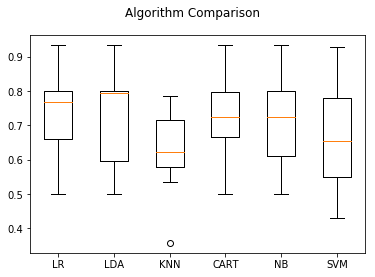

In [108]:
fig = plt.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

In [109]:
model = LogisticRegression()

In [110]:
model.fit(X_train, y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [111]:
y_predict=model.predict(X_test)

In [117]:
accuracy=1-error

In [116]:
error = mean_squared_error(y_test, y_predict)

In [118]:
accuracy

0.7297297297297297

In [119]:
#well doneeeeee

In [ ]:
#N